In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import cv2
import os
import random
import matplotlib.pyplot as plt 
import pickle 
from multiprocessing import Pool, Manager, cpu_count, Lock
import pickle
import keras  
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation,Dropout
import keras.losses
import time
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,AveragePooling2D, Dense

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=[0.15,0.2],
        height_shift_range=[0.15,0.2],
        rescale=1./255,
        zoom_range=0.2,
        brightness_range=[0.5,1.5],
        fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/traning_V2/fprint_mix/train",target_size=(299,299),batch_size=32,shuffle=True,classes=["ARCH","RL","UL","WST","WPL","WE","WCDI"]) 

Found 29982 images belonging to 7 classes.


In [ ]:
val_generator = val_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/traning_V2/fprint_mix/val",target_size=(299,299),batch_size=32,shuffle=True,classes=["ARCH","RL","UL","WST","WPL","WE","WCDI"]) 

Found 6424 images belonging to 7 classes.


In [ ]:
for data_batch,label_batch in train_generator:
  print(data_batch.shape)
  print(label_batch.shape)
  break

(32, 299, 299, 3)
(32, 7)


In [ ]:
baseModel = tf.keras.applications.Xception(include_top=False, weights="imagenet",input_shape=(299,299,3),classes=7) 

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
n_outputs= 7
fcHead = baseModel.output
# Output layer với softmax activation
# fcHead = Flatten()(fcHead)
fcHead = GlobalAveragePooling2D()(fcHead)
fcHead = Dense(512,activation="relu")(fcHead)
fcHead = Dense(n_outputs, activation='softmax')(fcHead)
model = tf.keras.Model(inputs=baseModel.input, outputs=fcHead)

In [ ]:
for layer in baseModel.layers:
    layer.trainable =True 

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/Miczone/fingerprint/traning_V2/results/Xception299_2205.h5",
    monitor='val_loss',
    save_best_only=True)

In [ ]:
csv_logger = keras.callbacks.CSVLogger("/content/drive/MyDrive/Miczone/fingerprint/result/Xception299_2205.csv",separator=',',append=True)  

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(amsgrad=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,epochs=20, validation_data = val_generator,verbose = 1,callbacks=[model_checkpoint_callback,csv_logger]) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
937/937 [==============================] - 26717s 28s/step - loss: 0.7227 - accuracy: 0.7385 - val_loss: 0.5652 - val_accuracy: 0.7984
Epoch 2/20
937/937 [==============================] - 850s 906ms/step - loss: 0.5817 - accuracy: 0.7907 - val_loss: 0.5275 - val_accuracy: 0.8143
Epoch 3/20
937/937 [==============================] - 835s 891ms/step - loss: 0.5375 - accuracy: 0.8030 - val_loss: 0.5244 - val_accuracy: 0.8154
Epoch 4/20
937/937 [==============================] - 833s 888ms/step - loss: 0.5141 - accuracy: 0.8136 - val_loss: 0.5284 - val_accuracy: 0.8116
Epoch 5/20
937/937 [==============================] - 827s 882ms/step - loss: 0.4908 - accuracy: 0.8232 - val_loss: 0.4957 - val_accuracy: 0.8241
Epoch 6/20
937/937 [==============================] - 823s 878ms/step - loss: 0.4762 - accuracy: 0.8264 - val_loss: 0.4587 - val_accuracy: 0.8327
Epoch 7/20
937/937 [==============================] - 819s 873ms/step - loss: 0.4581 - accuracy: 0.8334 - val_loss: 0.4572 -

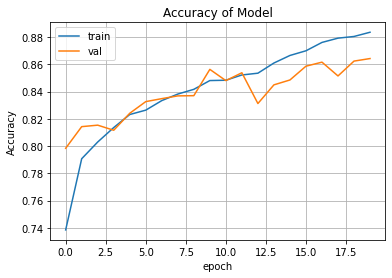

In [ ]:
import pandas as pd
plt.title('Accuracy of Model')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

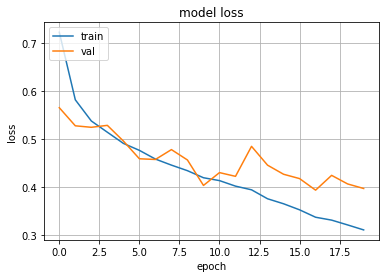

In [ ]:
plt.title('Loss of Model')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Miczone/fingerprint/traning_V2/results/Xception299_2205.h5')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/traning_V2/fprint_mix/test",target_size=(299,299),batch_size=6424,class_mode="sparse",classes=["ARCH","RL","UL","WST","WPL","WE","WCDI"]) 

Found 6424 images belonging to 7 classes.


In [ ]:
for Xtest,Ytest in test_generator:
  X_test = Xtest
  Y_test = Ytest
  break

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred_idx = np.argmax(pred, axis=1)

In [ ]:
print(classification_report(Y_test, pred_idx,target_names=['ARCH', 'RL','UL','WCDI','WE',"WPL","WST"]))

              precision    recall  f1-score   support

        ARCH       0.94      0.95      0.94       848
          RL       0.95      0.96      0.96      1468
          UL       0.97      0.94      0.96      1463
        WCDI       0.61      0.74      0.67       537
          WE       0.43      0.68      0.53        78
         WPL       0.76      0.71      0.73      1018
         WST       0.79      0.74      0.77      1012

    accuracy                           0.86      6424
   macro avg       0.78      0.82      0.79      6424
weighted avg       0.87      0.86      0.86      6424



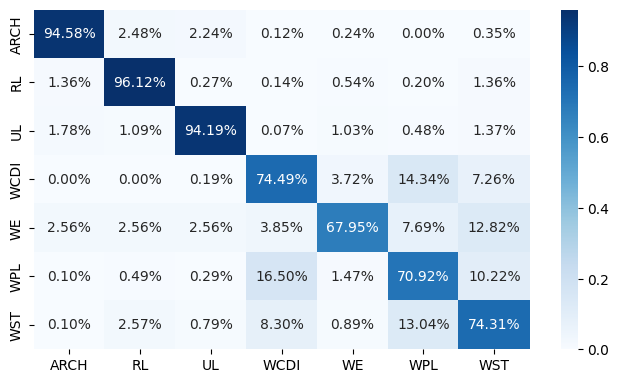

In [ ]:
import pandas as pd
import seaborn as sns
cm = confusion_matrix(Y_test,pred_idx)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index=['ARCH', 'RL','UL','WCDI','WE',"WPL","WST"], columns=['ARCH', 'RL','UL','WCDI','WE',"WPL","WST"])
plt.figure(figsize = (8,4.5),dpi=100)
sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='.2%')
plt.show()